In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
import itertools

%matplotlib inline

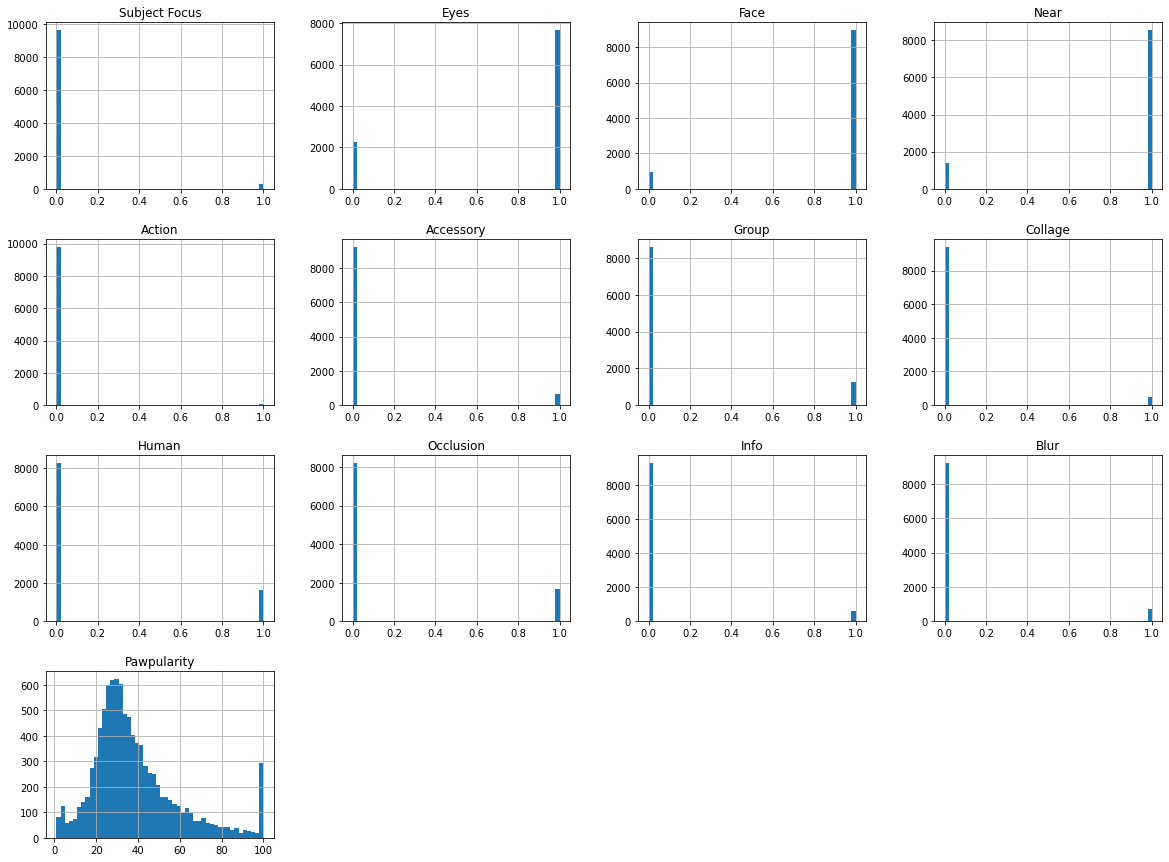

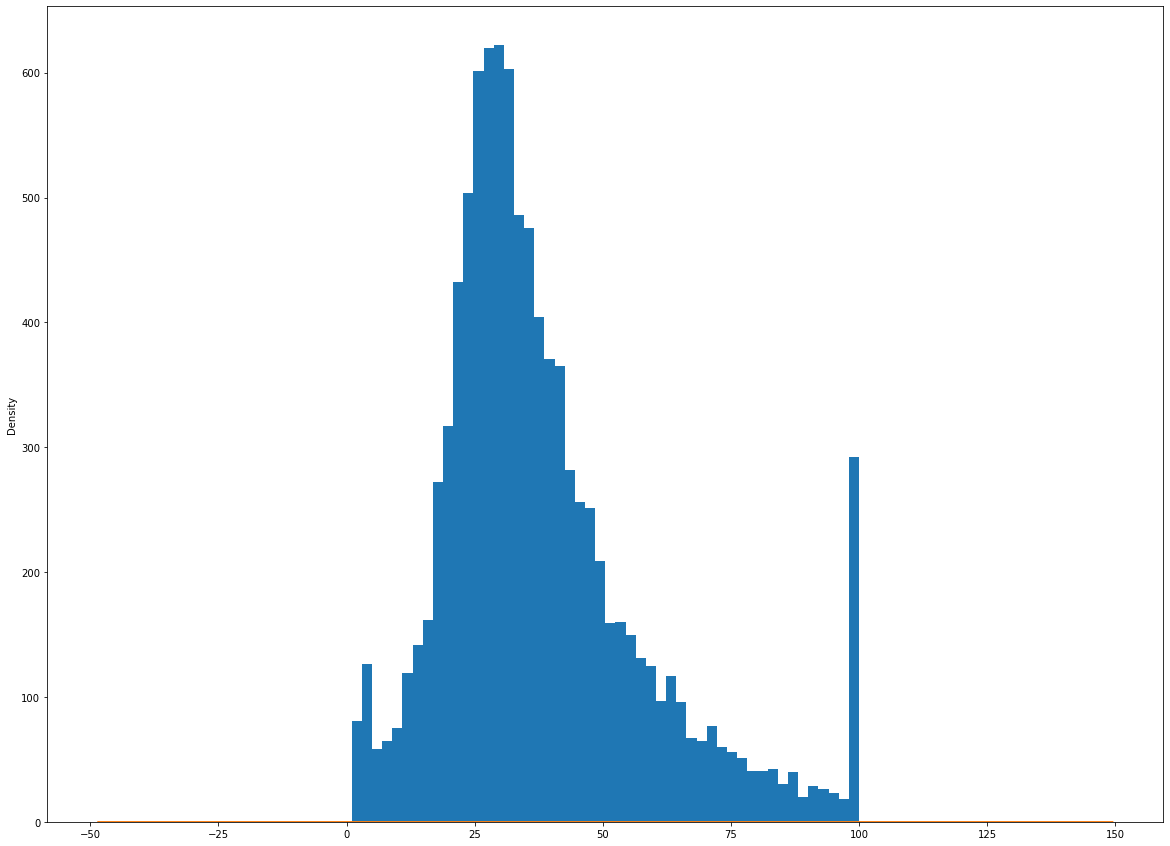

In [49]:
paw_train = pd.read_csv('train.csv')
paw_train.hist(bins=50,figsize=(20,15))
plt.show()
paw_train
y = paw_train['Pawpularity']
y.hist(bins=50,figsize=(20,15))
ax = y.plot.kde()

In [50]:
paw_train['Pawpularity'].describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

In [51]:
paw_matrix = paw_train.corr()
paw_matrix['Pawpularity'].sort_values(ascending=False)
# Group, Accessory, and Face have strong Corralation

Pawpularity      1.000000
Group            0.016469
Accessory        0.013287
Face             0.008018
Human            0.003983
Occlusion        0.001979
Collage          0.001732
Near             0.001001
Action          -0.001373
Info            -0.004735
Eyes            -0.006686
Subject Focus   -0.009853
Blur            -0.023540
Name: Pawpularity, dtype: float64

In [52]:
#feature_cols = ['Eyes','Face','Accessory','Group']
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = paw_train[feature_cols]
y = paw_train['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

In [53]:
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)

LinearRegression()

In [54]:
# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

37.32242826629845
[-2.46177616 -4.38998163  3.57919146  1.2512897   0.4187078   0.23616999
  1.53588176  0.30095964  1.10229038 -1.4014051  -0.39532514 -4.19453837]


In [55]:
y_prediction = my_linreg.predict(X_test)
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

20.628257900987727


In [56]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

print(y_prediction)

[37.76292779 37.65403964 37.76292779 ... 37.76292779 37.76292779
 37.76292779]


In [57]:
my_pca = PCA(n_components=4)
X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.fit_transform(X_test)

In [58]:
pca_reg = LinearRegression()
pca_reg.fit(X_train_new,y_train)
print(pca_reg.intercept_)
print(pca_reg.coef_)
y_predict_new = pca_reg.predict(X_test_new)
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_new)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)


38.04254245838238
[ 0.93639133  0.1615229  -0.37960934 -1.48757628]
20.59934184732713


In [59]:
all_combinations = []
for r in range(len(feature_cols) + 1):
    combinations_object = itertools.combinations(feature_cols, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
    
print(len(all_combinations))

4096


In [ ]:
results_lst = []

combinations = [list(ele) for ele in all_combinations]
# 0 empty
# 1-12 Single Feature
for combo in combinations[1:]:
    combo_reg = LinearRegression()
    X = paw_train[combo]
    y = paw_train['Pawpularity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)
    combo_reg.fit(X_train,y_train)
    inter = combo_reg.intercept_
    coef = combo_reg.coef_
    y_predict = combo_reg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    results_lst.append((combo,coef,inter,rmse))#(Features,coef,inter,rmse)
    print(combo,inter,rmse,sep=': ')


['Subject Focus']: 38.11433506044905: 20.576245696949847
['Eyes']: 39.320058997050104: 20.60340842380124
['Face']: 37.88235294117648: 20.56744820354283
['Near']: 37.52619047619048: 20.571931004567432
['Action']: 38.03826530612245: 20.568506243246905
['Accessory']: 38.038628158844766: 20.56777358412096
['Group']: 37.893810444874276: 20.566721267390296
['Collage']: 38.056874557051735: 20.56886294061626
['Human']: 38.022969977835984: 20.56798093843143
['Occlusion']: 38.17467071935157: 20.578002052525523
['Info']: 38.08085867620751: 20.56867934495889
['Blur']: 38.09922143762448: 20.560287483456506
['Subject Focus', 'Eyes']: 39.32710997203135: 20.608813560468743
['Subject Focus', 'Face']: 37.89699472900623: 20.575251759504734
['Subject Focus', 'Near']: 37.53620552602109: 20.580639420870245
['Subject Focus', 'Action']: 38.109579253406935: 20.576563286942644
['Subject Focus', 'Accessory']: 38.106989564814825: 20.57540008499267
['Subject Focus', 'Group']: 37.97085289778231: 20.57449268283679
[

In [22]:
print("Min RMSE", min(results_lst, key=lambda tuple:tuple[3]))
print("Min RMSE", max(results_lst, key=lambda tuple:tuple[3]))

NameError: name 'results_lst' is not defined

In [197]:
from sklearn.tree import DecisionTreeRegressor

feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = paw_train[feature_cols]
y = paw_train['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)
y_1 = regr_1.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_1)
rmse = np.sqrt(mse)
print(rmse)

20.618496862551037


In [196]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0)
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = paw_train[feature_cols]
y = paw_train['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

regr.fit(X_train, y_train)
y_2 = regr.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_2)
rmse = np.sqrt(mse)
print(rmse)

20.584236433167302
